This files creates the training and test datasets for all other notebooks and scripts to reuse. This is the file I would typically use for an exploratory analysis.

In [1]:
import pickle
import time

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import helpsk as hlp

%matplotlib inline

# Load Data

In [2]:
# https://www.openml.org/d/537
housing_g = fetch_openml('houses', version=1)

housing = housing_g['data']
housing['target'] = housing_g['target']
del housing_g

print(housing.shape)
housing.head()

(20640, 9)


,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,target
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,452600.0
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,358500.0
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,352100.0
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,341300.0
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,342200.0


In [3]:
## Create Missing Values
housing['median_income'].iloc[0:46] = np.nan
housing['housing_median_age'].iloc[25:75] = np.nan
housing['total_rooms'].iloc[10:54] = 0

In [4]:
hlp.pandas.numeric_summary(housing)

,# of Non-Nulls,# of Nulls,% Nulls,# of Zeros,% Zeros,Mean,St Dev.,Coef of Var,Skewness,Kurtosis,Min,10%,25%,50%,75%,90%,Max
median_income,"20,594",46,0.0%,0,0.0%,3.9,1.9,0.5,1.6,5.0,0.5,1.9,2.6,3.5,4.8,6.2,15.0
housing_median_age,"20,590",50,0.0%,0,0.0%,28.6,12.6,0.4,0.1,-0.8,1.0,12.0,18.0,29.0,37.0,46.0,52.0
total_rooms,"20,640",0,0.0%,44,0.0%,"2,632.3","2,184.3",0.8,4.1,32.5,0.0,932.0,"1,444.0","2,125.0","3,146.2","4,651.5","39,320.0"
total_bedrooms,"20,640",0,0.0%,0,0.0%,537.9,421.2,0.8,3.5,21.9,1.0,198.0,295.0,435.0,647.0,966.0,"6,445.0"
population,"20,640",0,0.0%,0,0.0%,"1,425.5","1,132.5",0.8,4.9,73.5,3.0,510.0,787.0,"1,166.0","1,725.0","2,566.0","35,682.0"
households,"20,640",0,0.0%,0,0.0%,499.5,382.3,0.8,3.4,22.1,1.0,184.0,280.0,409.0,605.0,890.0,"6,082.0"
latitude,"20,640",0,0.0%,0,0.0%,35.6,2.1,0.1,0.5,-1.1,32.5,33.6,33.9,34.3,37.7,38.5,42.0
longitude,"20,640",0,0.0%,0,0.0%,-119.6,2.0,-0.0,-0.3,-1.3,-124.3,-122.3,-121.8,-118.5,-118.0,-117.2,-114.3
target,"20,640",0,0.0%,0,0.0%,"206,855.8","115,395.6",0.6,1.0,0.3,"14,999.0","82,300.0","119,600.0","179,700.0","264,725.0","376,600.0","500,001.0"


In [5]:
hlp.pandas.non_numeric_summary(housing)

# Training and Test Data

In [6]:
y_full = housing['target']
X_full = housing.drop(columns='target')

del housing

<AxesSubplot:ylabel='Frequency'>

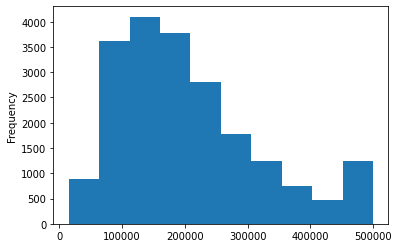

In [7]:
y_full.plot.hist()

In [8]:
y_full[0:10]

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: target, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(len(y_train))

print(X_test.shape)
print(len(y_test))

(16512, 8)
16512
(4128, 8)
4128


In [11]:
import helpsk.sklearn_search_bayesian_regression as br
from skopt.space import Categorical
search_space = hlp.sklearn_search_bayesian.BayesianSearchSpace(
    data=X_train,
    model_search_spaces= [
        br.ElasticNetBayesianSearchSpace(encoders=Categorical([None]),
                                         pca=Categorical([None]),
                                         iterations=50, random_state=42),
        br.ExtraTreesBayesianSearchSpace(encoders=Categorical([None]),
                                         pca=Categorical([None]),
                                         iterations=50, random_state=42),
        br.RandomForestBayesianSearchSpace(encoders=Categorical([None]),
                                           pca=Categorical([None]),
                                           iterations=50, random_state=42),
    ],
    #model_type='regression',
    #iterations=50,
    #random_state=42,
)

In [12]:
# pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.model_selection import RepeatedKFold


#_, X_sample, _, y_sample = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#print(X_sample.shape)

bayes_search = BayesSearchCV(
    estimator=search_space.pipeline(),
    search_spaces=search_space.search_spaces(),
    cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42),  # 5 fold 2 repeat CV
    #scoring='neg_root_mean_squared_error',
    scoring='neg_mean_absolute_error',
    refit=False,  # required if passing in multiple scorers
    return_train_score=False,
    # n_jobs=-1,
    verbose=2,
    random_state=42,
)

start_time = time.time()
bayes_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=4.327314157965783, model__l1_ratio=0.16360717863855026, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.0s
[CV] END model=ElasticNet(random_state=42), model__alpha=4.327314157965783, model__l1_ratio=0.16360717863855026, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=4.327314157965783, model__l1_ratio=0.16360717863855026, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numer

[CV] END model=ElasticNet(random_state=42), model__alpha=3.3117333277546708, model__l1_ratio=0.49646670359671674, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=3.3117333277546708, model__l1_ratio=0.49646670359671674, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=3.3117333277546708, model__l1_ratio=0.49646670359671674, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total

[CV] END model=ElasticNet(random_state=42), model__alpha=0.001415432409209151, model__l1_ratio=0.48651379837251874, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.001415432409209151, model__l1_ratio=0.48651379837251874, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.001415432409209151, model__l1_ratio=0.48651379837251874, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler();

[CV] END model=ElasticNet(random_state=42), model__alpha=1.1997705954266877e-05, model__l1_ratio=0.8501355739374978, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.2s
[CV] END model=ElasticNet(random_state=42), model__alpha=1.1997705954266877e-05, model__l1_ratio=0.8501355739374978, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=1.1997705954266877e-05, model__l1_ratio=0.8501355739374978, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=0.09482598907379183, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.09482598907379183, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.09482598907379183, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=S

[CV] END model=ElasticNet(random_state=42), model__alpha=0.00012025738707071929, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00012025738707071929, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00012025738707071929, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=Elastic

[CV] END model=ElasticNet(random_state=42), model__alpha=0.0005711452423976937, model__l1_ratio=0.9851912436480373, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0005711452423976937, model__l1_ratio=0.9851912436480373, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.2s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0005711452423976937, model__l1_ratio=0.9851912436480373, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardSca

[CV] END model=ElasticNet(random_state=42), model__alpha=0.08885577792619599, model__l1_ratio=0.9916656024809188, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08885577792619599, model__l1_ratio=0.9916656024809188, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08885577792619599, model__l1_ratio=0.9916656024809188, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler();

[CV] END model=ElasticNet(random_state=42), model__alpha=3.748702530266597e-05, model__l1_ratio=0.9786154173549674, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0001486593162551249, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0001486593162551249, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__sc

[CV] END model=ElasticNet(random_state=42), model__alpha=0.0001536180045464162, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0001536180045464162, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0001536180045464162, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet

[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015390661478035926, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08786566078119339, model__l1_ratio=0.9953508876239533, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08786566078119339, model__l1_ratio=0.9953508876239533, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep_

[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015580876264894588, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015580876264894588, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015580876264894588, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=Elastic

[CV] END model=ElasticNet(random_state=42), model__alpha=3.447468697985735e-05, model__l1_ratio=0.9746667656897587, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=3.447468697985735e-05, model__l1_ratio=0.9746667656897587, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08756084200277629, model__l1_ratio=0.9980906429149976, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__trans

[CV] END model=ElasticNet(random_state=42), model__alpha=0.0874821808258901, model__l1_ratio=0.9989595321872952, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0874821808258901, model__l1_ratio=0.9989595321872952, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.0874821808258901, model__l1_ratio=0.9989595321872952, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); to

[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015930535312352876, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00015930535312352876, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00016020081848389117, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transfor

[CV] END model=ElasticNet(random_state=42), model__alpha=0.08804095999556147, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08804095999556147, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.08804095999556147, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=2.9554298343791236e-05, model__l1_ratio=0.9142662194437099, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.9554298343791236e-05, model__l1_ratio=0.9142662194437099, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.9554298343791236e-05, model__l1_ratio=0.9142662194437099, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__

[CV] END model=ElasticNet(random_state=42), model__alpha=2.9216382978820243e-05, model__l1_ratio=0.9189869230065129, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.9216382978820243e-05, model__l1_ratio=0.9189869230065129, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.9216382978820243e-05, model__l1_ratio=0.9189869230065129, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=Standard

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), model__alpha=2.868655494621746e-05, model__l1_ratio=0.9564934929529793, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.868655494621746e-05, model__l1_ratio=0.9564934929529793, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=2.868655494621746e-05, model__l1_ratio=0.9564934929529793, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__tra

[CV] END model=ElasticNet(random_state=42), model__alpha=0.00016479722672643404, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00016479722672643404, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.1s
[CV] END model=ElasticNet(random_state=42), model__alpha=0.00016479722672643404, model__l1_ratio=1.0, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=MinMaxScaler(); total time=   0.2s
[CV] END model=Elastic

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ElasticNet(random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.0s
[CV] END model=ElasticNet(random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.0s
[CV] END model=ElasticNet(random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=StandardScaler(); total time=   0.0s
[CV] END model=ElasticNet(random_state=42), prep__non_numeric__encoder__transf

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=93, model__max_features=0.6057710800117708, model__max_samples=0.9060489170254469, model__min_samples_leaf=2, model__min_samples_split=45, model__n_estimators=1567, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.1s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=93, model__max_features=0.6057710800117708, model__max_samples=0.9060489170254469, model__min_samples_leaf=2, model__min_samples_split=45, model__n_estimators=1567, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.1s
[CV]

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=25, model__max_features=0.7525791611073264, model__max_samples=0.5395695356548951, model__min_samples_leaf=20, model__min_samples_split=5, model__n_estimators=1529, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   4.9s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=25, model__max_features=0.7525791611073264, model__max_samples=0.5395695356548951, model__min_samples_leaf=20, model__min_samples_split=5, model__n_estimators=1529, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transfo

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=28, model__max_features=0.12887729678685358, model__max_samples=0.6562848866932125, model__min_samples_leaf=49, model__min_samples_split=45, model__n_estimators=1648, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.0s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=28, model__max_features=0.12887729678685358, model__max_samples=0.6562848866932125, model__min_samples_leaf=49, model__min_samples_split=45, model__n_estimators=1648, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.0s


[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=66, model__max_features=0.07544840465806944, model__max_samples=0.5265932728102989, model__min_samples_leaf=10, model__min_samples_split=22, model__n_estimators=1892, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.4s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=66, model__max_features=0.07544840465806944, model__max_samples=0.5265932728102989, model__min_samples_leaf=10, model__min_samples_split=22, model__n_estimators=1892, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.4s


[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=10, model__max_features=0.17594073211649786, model__max_samples=0.7785859384669823, model__min_samples_leaf=38, model__min_samples_split=44, model__n_estimators=1515, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   1.9s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=10, model__max_features=0.17594073211649786, model__max_samples=0.7785859384669823, model__min_samples_leaf=38, model__min_samples_split=44, model__n_estimators=1515, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   1.9s


[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=47, model__max_features=0.8584842529429693, model__max_samples=0.8426731247161765, model__min_samples_leaf=12, model__min_samples_split=7, model__n_estimators=1899, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   8.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=47, model__max_features=0.8584842529429693, model__max_samples=0.8426731247161765, model__min_samples_leaf=12, model__min_samples_split=7, model__n_estimators=1899, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   8.5s
[CV]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.7700314355109567, model__max_samples=0.6305109551986221, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=1222, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   5.7s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.7700314355109567, model__max_samples=0.6305109551986221, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=1222, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequ

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=1, model__max_features=0.7618623438365754, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=50, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.7s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=1, model__max_features=0.7618623438365754, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=50, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.7s
[CV] END model=ExtraTreesRegressor(b

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=100, model__max_features=0.7385537332919088, model__max_samples=0.5907497835339921, model__min_samples_leaf=1, model__min_samples_split=32, model__n_estimators=1709, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=100, model__max_features=0.7385537332919088, model__max_samples=0.5907497835339921, model__min_samples_leaf=1, model__min_samples_split=32, model__n_estimators=1709, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.4s
[C

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.7820713529520572, model__max_samples=0.7484523281217609, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=1049, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   5.4s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.7820713529520572, model__max_samples=0.7484523281217609, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=1049, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__s

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.8163366307924128, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=812, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   4.9s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=84, model__max_features=0.8163366307924128, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=18, model__n_estimators=812, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=83, model__max_features=0.8442321691212538, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   3.3s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=83, model__max_features=0.8442321691212538, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   3.3s
[CV] END model=ExtraTreesRegressor(b

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=82, model__max_features=0.8563205527688004, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   3.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=82, model__max_features=0.8563205527688004, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   3.6s
Fitting 10 folds for each of 1 candida

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=80, model__max_features=0.879044013044633, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=80, model__max_features=0.879044013044633, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=81, model__max_features=0.87656972993488, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   6.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=81, model__max_features=0.87656972993488, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=80, model__max_features=0.8649366070574878, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1589, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  18.8s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8562244591791678, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__trans

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8523276075460131, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8523276075460131, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=81, model__max_features=0.8438049152269812, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.7s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=81, model__max_features=0.8438049152269812, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[C

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=1, model__max_features=0.95, model__max_samples=1.0, model__min_samples_leaf=50, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.8s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=1, model__max_features=0.95, model__max_samples=1.0, model__min_samples_leaf=50, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   2.7s
Fitting 10 folds

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8515819688813366, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8515819688813366, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8503879355587782, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8503879355587782, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8448654023328106, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1990, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.4s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8448654023328106, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1990, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8471454325997235, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8471454325997235, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=64, model__max_features=0.7920958757761576, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=64, model__max_features=0.7920958757761576, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8455242816061876, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=79, model__max_features=0.8455242816061876, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8472238983353407, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.5s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8472238983353407, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.7906859009911135, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.7906859009911135, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__trans

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.7903617104673519, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.7903617104673519, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8484123183230037, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.6s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=78, model__max_features=0.8484123183230037, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.7903606654601246, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.7s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=62, model__max_features=0.790439339140637, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=2000, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transf

[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   7.0s
[CV] END model=ExtraTreesRegressor(bootstrap=True, n_estimators=500, random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   7.0s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=6, model__max_features=0.33700115168248823, model__max_samples=0.5670098883064899, model__min_samples_leaf=7, model__min_samples_split=25, model__n_estimators=698, prep__non_numeric

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=65, model__max_features=0.049983453871496254, model__max_samples=0.8802927231565685, model__min_samples_leaf=27, model__min_samples_split=40, model__n_estimators=1781, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  10.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=65, model__max_features=0.049983453871496254, model__max_samples=0.8802927231565685, model__min_samples_leaf=27, model__min_samples_split=40, model__n_estimators=1781, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=40, model__max_features=0.8386099814707594, model__max_samples=0.6192423345481368, model__min_samples_leaf=37, model__min_samples_split=3, model__n_estimators=606, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   9.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=40, model__max_features=0.8386099814707594, model__max_samples=0.6192423345481368, model__min_samples_leaf=37, model__min_samples_split=3, model__n_estimators=606, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   9.8s
[CV] END model=RandomForestRegress

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=64, model__max_features=0.3627788764075036, model__max_samples=0.6344690650537531, model__min_samples_leaf=5, model__min_samples_split=12, model__n_estimators=1976, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  18.2s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=64, model__max_features=0.3627788764075036, model__max_samples=0.6344690650537531, model__min_samples_leaf=5, model__min_samples_split=12, model__n_estimators=1976, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; tot

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=74, model__max_features=0.13417557229227609, model__max_samples=0.9284887362251846, model__min_samples_leaf=45, model__min_samples_split=49, model__n_estimators=1698, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=   9.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=74, model__max_features=0.13417557229227609, model__max_samples=0.9284887362251846, model__min_samples_leaf=45, model__min_samples_split=49, model__n_estimators=1698, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=35, model__max_features=0.8393326218578765, model__max_samples=0.7380830922150186, model__min_samples_leaf=33, model__min_samples_split=28, model__n_estimators=636, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  12.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=35, model__max_features=0.8393326218578765, model__max_samples=0.7380830922150186, model__min_samples_leaf=33, model__min_samples_split=28, model__n_estimators=636, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='median'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  12.0

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=36, model__max_features=0.37893830626920677, model__max_samples=0.9921703652295014, model__min_samples_leaf=48, model__min_samples_split=33, model__n_estimators=1496, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  17.9s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=36, model__max_features=0.37893830626920677, model__max_samples=0.9921703652295014, model__min_samples_leaf=48, model__min_samples_split=33, model__n_estimators=1496, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  18.1s
Fitting 10 folds for each of

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7907248074860558, model__max_samples=0.7519549334864754, model__min_samples_leaf=4, model__min_samples_split=12, model__n_estimators=1477, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  38.2s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7907248074860558, model__max_samples=0.7519549334864754, model__min_samples_leaf=4, model__min_samples_split=12, model__n_estimators=1477, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; tot

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.786901451454898, model__max_samples=0.7971364054926957, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=1557, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  45.3s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.786901451454898, model__max_samples=0.7971364054926957, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=1557, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7869315138312356, model__max_samples=0.7709219735610284, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=1477, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  41.5s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7869315138312356, model__max_samples=0.7709219735610284, model__min_samples_leaf=1, model__min_samples_split=12, model__n_estimators=1477, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; tot

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7674790321811175, model__max_samples=0.7485389114983315, model__min_samples_leaf=1, model__min_samples_split=11, model__n_estimators=877, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  24.5s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.7674790321811175, model__max_samples=0.7485389114983315, model__min_samples_leaf=1, model__min_samples_split=11, model__n_estimators=877, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=65, model__max_features=0.7490305855656256, model__max_samples=0.60556568788677, model__min_samples_leaf=1, model__min_samples_split=16, model__n_estimators=1143, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  22.2s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=65, model__max_features=0.7490305855656256, model__max_samples=0.60556568788677, model__min_samples_leaf=1, model__min_samples_split=16, model__n_estimators=1143, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=58, model__max_features=0.7782264105375335, model__max_samples=0.7997244332582736, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=898, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  26.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=58, model__max_features=0.7782264105375335, model__max_samples=0.7997244332582736, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=898, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=52, model__max_features=0.7991628116870183, model__max_samples=0.9539310438042579, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=923, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  32.3s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=52, model__max_features=0.7991628116870183, model__max_samples=0.9539310438042579, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=923, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total t

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=50, model__max_features=0.8021810857816759, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=654, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  24.5s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=50, model__max_features=0.8021810857816759, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=654, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__sc

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=53, model__max_features=0.8007593767094563, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  17.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=53, model__max_features=0.8007593767094563, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  17.9s
[CV] END model=Ran

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.796445026709125, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=782, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  27.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.796445026709125, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=782, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  27.9s
[CV] END model=Rando

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.945298888101787, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=61, model__max_features=0.945298888101787, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.0s
[CV] END model=Rando

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=39, model__max_features=0.7975357611807795, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=819, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  33.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=39, model__max_features=0.7975357611807795, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=819, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  33.2s
Fitting 10 folds f

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=39, model__max_features=0.799419496720351, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  20.1s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=39, model__max_features=0.799419496720351, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  20.2s
[CV] END model=Rando

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.793390425522667, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1127, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  45.6s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.793390425522667, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1127, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  45.3s
[CV] END model=Ran

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7963106803958078, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  20.3s
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7945869877128178, model__max_samples=1.0, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=1079, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__s

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7888959538027636, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1426, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  50.9s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7888959538027636, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1426, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  50.8s
[CV] END model=R

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7707082196042276, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1387, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  49.4s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7707082196042276, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1387, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  49.5s
[CV] END model=R

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.778830888417806, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=651, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  23.2s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.778830888417806, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=651, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scal

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7888705301826635, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1753, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time= 1.0min
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=38, model__max_features=0.7888705301826635, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1753, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time= 1.0min
[CV] END model=R

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7779812365337594, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1547, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  55.1s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7779812365337594, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1547, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  55.2s
[CV] END model=R

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7757510153525443, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=940, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  33.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7757510153525443, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=940, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  33.7s
[CV] END model=Ran

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7638501376775754, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1323, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  47.0s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7638501376775754, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1323, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  47.4s
Fitting 10 folds

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7667176044782387, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1184, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  42.5s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), model__criterion=squared_error, model__max_depth=37, model__max_features=0.7667176044782387, model__max_samples=1.0, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1184, prep__non_numeric__encoder__transformer=None, prep__numeric__imputer__transformer=SimpleImputer(strategy='most_frequent'), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  42.6s
[CV] END model=R

[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  25.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  25.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), prep__non_numeric__encoder__transformer=OneHotEncoder(handle_unknown='ignore'), prep__numeric__imputer__transformer=SimpleImputer(), prep__numeric__pca__transformer=None, prep__numeric__scaler__transformer=None; total time=  25.8s
[CV] END model=RandomForestRegressor(n_estimators=500, random_state=42), prep__non_numer

In [13]:
print(f"Elapsed time to run BayesSearchCV: {elapsed_time:.3f} seconds; {elapsed_time / 60:.1f} minutes")

Elapsed time to run BayesSearchCV: 22545.168 seconds; 375.8 minutes


In [14]:
print(bayes_search.best_score_)

-32195.20676071717


In [15]:
print(bayes_search.best_params_)

OrderedDict([('model', RandomForestRegressor(n_estimators=500, random_state=42)), ('model__criterion', 'squared_error'), ('model__max_depth', 37), ('model__max_features', 0.7757510153525443), ('model__max_samples', 1.0), ('model__min_samples_leaf', 2), ('model__min_samples_split', 2), ('model__n_estimators', 940), ('prep__non_numeric__encoder__transformer', None), ('prep__numeric__imputer__transformer', SimpleImputer(strategy='most_frequent')), ('prep__numeric__pca__transformer', None), ('prep__numeric__scaler__transformer', None)])


In [16]:
results = hlp.sklearn_eval.MLExperimentResults.from_sklearn_search_cv(
    searcher=bayes_search,
    higher_score_is_better=False,
    description='BayesSearchCV using Regression Search Space',
    parameter_name_mappings=search_space.param_name_mappings()
)

In [17]:
results.to_yaml_file(yaml_file_name = 'regression - BayesSearchCV.yaml')

In [18]:
results = hlp.sklearn_eval.MLExperimentResults.from_yaml_file(yaml_file_name = 'regression - BayesSearchCV.yaml')

In [19]:
results.best_score

32195.20676071717

In [20]:
results.best_params

{'model': 'RandomForestRegressor()',
 'max_features': 0.7757510153525443,
 'max_depth': 37,
 'n_estimators': 940,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'criterion': 'squared_error',
 'imputer': "SimpleImputer(strategy='most_frequent')",
 'scaler': 'None',
 'pca': 'None',
 'encoder': 'None'}

In [21]:
results.to_formatted_dataframe(return_style=True,
                               include_rank=True,
                               num_rows=1000)

rank,neg_mean_absolute_error Mean,neg_mean_absolute_error 95CI.LO,neg_mean_absolute_error 95CI.HI,model,alpha,l1_ratio,max_features,max_depth,n_estimators,min_samples_split,min_samples_leaf,max_samples,criterion,imputer,scaler,encoder
1,"32,195.207","31,819.725","32,570.689",RandomForestRegressor(),<NA>,<NA>,0.776,37.000,940.000,2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
2,"32,202.695","31,828.331","32,577.060",RandomForestRegressor(),<NA>,<NA>,0.788,38.000,974.000,2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
3,"32,211.760","31,834.922","32,588.598",RandomForestRegressor(),<NA>,<NA>,0.764,37.000,"1,323.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
4,"32,212.459","31,834.369","32,590.549",RandomForestRegressor(),<NA>,<NA>,0.769,37.000,811.000,2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
5,"32,212.776","31,832.473","32,593.079",RandomForestRegressor(),<NA>,<NA>,0.776,37.000,"1,566.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
6,"32,213.739","31,833.682","32,593.797",RandomForestRegressor(),<NA>,<NA>,0.771,38.000,"1,387.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
7,"32,214.158","31,832.374","32,595.942",RandomForestRegressor(),<NA>,<NA>,0.778,37.000,"1,547.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
8,"32,214.265","31,834.938","32,593.592",RandomForestRegressor(),<NA>,<NA>,0.796,38.000,782.000,2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
9,"32,216.347","31,834.702","32,597.992",RandomForestRegressor(),<NA>,<NA>,0.789,38.000,"1,426.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
10,"32,217.235","31,835.363","32,599.108",RandomForestRegressor(),<NA>,<NA>,0.768,37.000,"1,496.000",2.000,2.000,1.000,squared_error,SimpleImputer(strategy='most_frequent'),None,None
